In [5]:
import sys
import os

# Get the absolute path of the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Add it to sys.path if not already added
if project_root not in sys.path:
    sys.path.append(project_root)

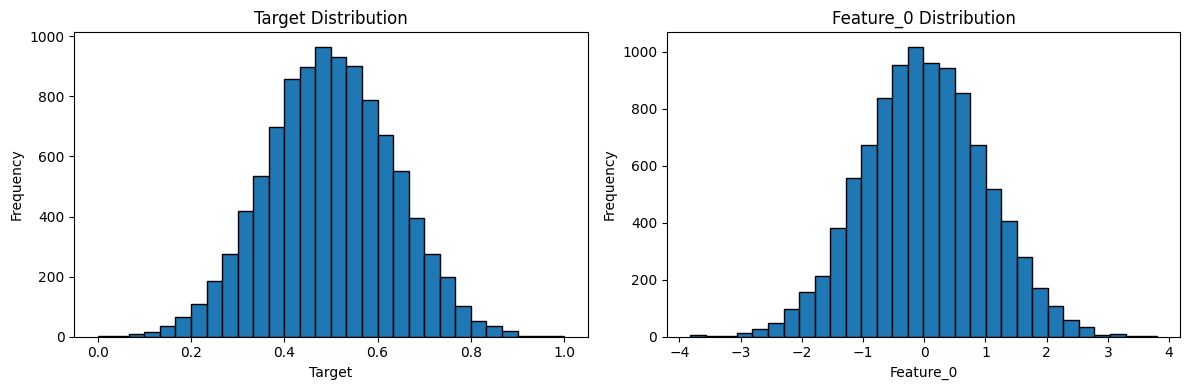


--- Dataset Info ---
Number of features: 1000
Number of informative features: 1000
Underlying feature distribution: Standard Normal (mean=0, std=1)


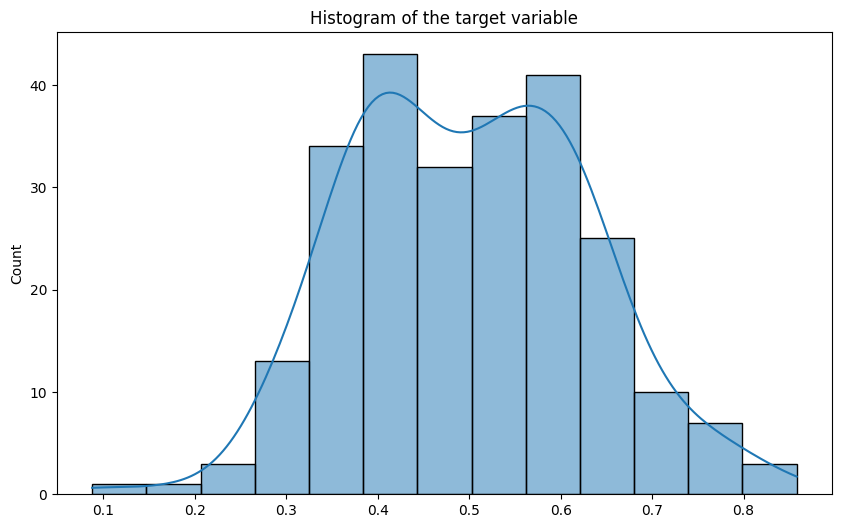

Train set size: 250
Test set size: 125
Calibration set size: 125
Train+Calibration set size: 375
 REMEMBERED  model_selection.py/ModelSelection.model_selection/a30525f03f0b2f77/4ccad2ac62ed4ad941dff6a59b508b76
Best Parameters: {'alpha': 0.01}
Best CV Score: -0.013
Ridge: Test Score (MSE): 0.013
BayesianRidge: Test Score (MSE): 0.011


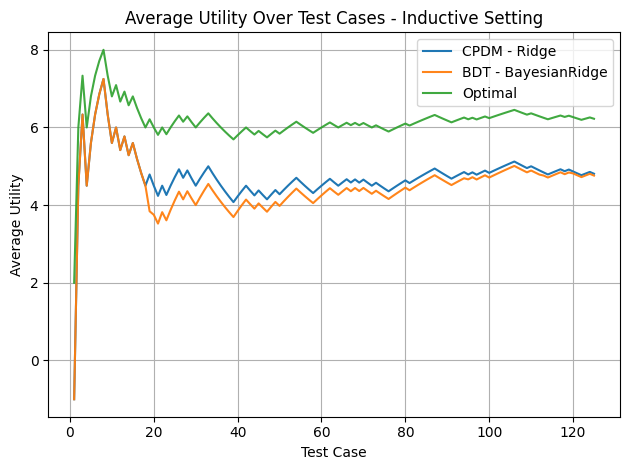

In [ ]:
from src.main import Main

# Parameters for data generation
df_params = {
    'N': 500,
    'F': 10,
    'feature_target_relationship': "make_regression", # make_regression, friedman1, friedman2, friedman3
    'n_informative': 5,
    'random_state': 2025,
    'noise': 0.1
}

# Utility values for decision outcomes
utility_dict = {
    'tp': 10,
    'tn': 2,
    'fp': -1,
    'fn': -8,
}

# Size of subset to be drawn from dataset
subset_size = 500

# Confidence level
epsilon = 0.05

# Data split ratios for training, testing, and calibration
datasplit_dict = {
    'train_test': 0.5,  # XX% of data initially goes to test+calibration
    'test_cal': 0.5,    # XX% of data goes to test
}

grid_search_space = {
    'knn': {
        'n_neighbors': [1, 3, 5, 7, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'ridge': {
        'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
    }
}

config_dict = {
    'mode': "Inductive",
    'knn': False,
    'ridge': True,
    'gp': False,
    'bayesian_ridge': True,
    'optimal': True,
    'predictive': False,
    'model_selection': True, 
    'grid_search_space': grid_search_space
}

# Instantiate and run Main class
main = Main(df_params, utility_dict, subset_size, epsilon, datasplit_dict, config_dict)
main.run()